In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pygamman import gamman
from jmd95 import eos

In [2]:
# make a T/S diagram of gamma_n and sigma 0

n = 200
T = np.linspace(-2,12,n)
S = np.linspace(34.8, 33.5, n)
SS, TT = np.meshgrid(S,T)

lon = 0.
lat = -60.
PP = np.zeros_like(SS)

In [3]:
N = len(T)*len(S)
gn, dg_lo, dg_hi = gamman.gamma_n(SS.ravel(), TT.ravel(), PP.ravel(), N, lon, lat )
gn.shape = SS.shape
gn = np.ma.masked_less(gn, 0.)

In [4]:
sig0, d1, d2 = eos.state_surface(TT, SS)

In [5]:
S0 = np.diag(SS)
T0 = np.diag(TT)
gn0 = np.ma.masked_less(np.diag(gn), 0.)
sig00 = np.diag(sig0)

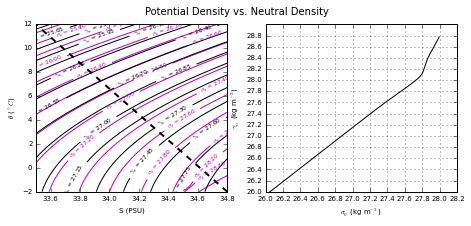

In [40]:
plt.rcParams['font.size'] = 7
plt.figure(figsize=(6.5,3))
plt.subplots_adjust(left=0.07, right=0.97, hspace=0.1)

plt.subplot(121)
cgn = plt.contour(SS, TT, gn, 20, colors='m', label=r'$\sigma_\theta$')
csg = plt.contour(SS, TT, sig0-1000, 20, colors='k', label=r'$\gamma_n$')
#plt.legend(loc='lower left')
plt.xlabel('S (PSU)')
plt.ylabel(r'$\theta$ ($^\circ C$)')

plt.clabel(cgn, fmt=r'$\sigma_{\theta}$ = %3.2f', fontsize=6)
plt.clabel(csg, fmt=r'$\gamma_n$ = %3.2f', fontsize=6)

plt.plot(S0, T0, 'k--', linewidth=2)

plt.subplot(122)
plt.plot(sig00-1000., gn0, 'k-')
plt.xlabel(r'$\sigma_0$ (kg m$^{-3}$)')
plt.ylabel(r'$\gamma_n$ (kg m$^{-3}$)')
plt.xticks(np.arange(26,29,0.2))
plt.yticks(np.arange(26,29,0.2))
plt.xlim([26,28.2])
plt.ylim([26,29])
plt.grid()

#plt.tight_layout()
plt.suptitle('Potential Density vs. Neutral Density', fontsize=10)
plt.savefig('../figures_ice_moc/potential_vs_neutral_density.pdf')

In [30]:
np.savez('sigma_vs_gamma', sigma0=sig00-1000., gamman=gn0.filled(np.nan))

In [105]:
#gnlevs = [26., 27., 27.84, 28.15]
gnlevs = [27., 27.6, 28.15]
s0levs = np.interp(gnlevs, gn0.compressed()[::-1],
                             np.ma.masked_array(sig00-1000., gn0.mask).compressed()[::-1])
for g, s in zip(gnlevs, s0levs):
    print '%g: %g' % (g, s)

27: 26.8749
27.6: 27.3761
28.15: 27.8086


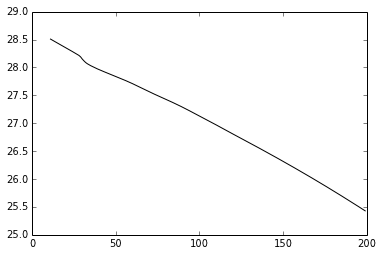

In [96]:
plt.plot(gn0)

In [74]:
sig00.shape

(200,)